In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:

path = r"C:\DataMining\Examen01\data\raw"

dataset = {
    "dfCalls": pd.read_csv(path + r"\megaline_calls.csv"),
    "dfInternet": pd.read_csv(path + r"\megaline_internet.csv"),
    "dfMessages": pd.read_csv(path + r"\megaline_messages.csv"),
    "dfPlans": pd.read_csv(path + r"\megaline_plans.csv"),
    "dfUsers": pd.read_csv(path + r"\megaline_users.csv")
}

# Check functions


In [55]:
# check for nan values 
def checkNan(df):
    for feature in df.columns:
        print(df[feature].value_counts(dropna=False))
        

In [56]:
#check column datat type
def checkDataType(df):
    for feature in df.columns:
        t=type(df[feature][0])
        print(feature+": "+str(t))

In [57]:
for df in dataset:
    dataset[df] = dataset[df].drop_duplicates()

# Visualizacion


## Calls EDA

In [58]:
dfCalls=dataset["dfCalls"]
print(dfCalls.shape)
dfCalls

(137735, 4)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [59]:
checkDataType(dfCalls)

id: <class 'str'>
user_id: <class 'numpy.int64'>
call_date: <class 'str'>
duration: <class 'numpy.float64'>


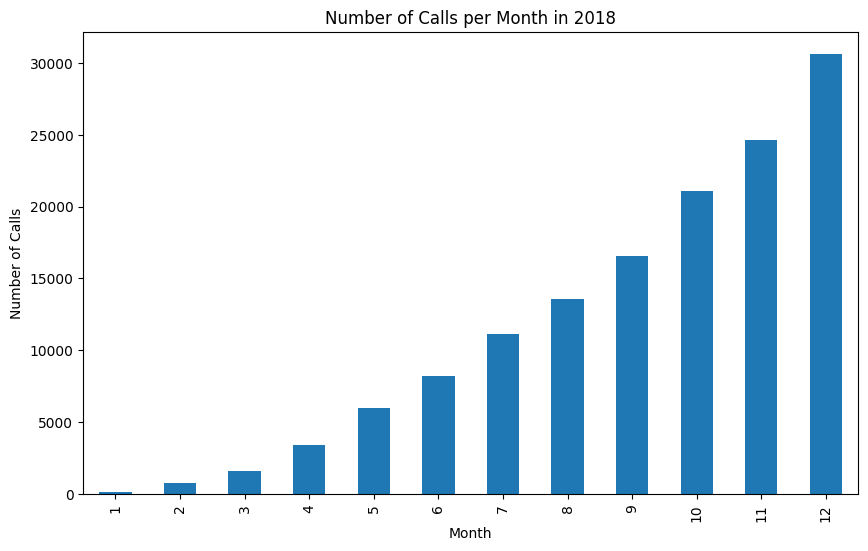

In [60]:


# Ensure call_date is in datetime format
dataset["dfCalls"]["call_date"] = pd.to_datetime(dataset["dfCalls"]["call_date"])

# Extract month from call_date
dataset["dfCalls"]["month"] = dataset["dfCalls"]["call_date"].dt.month

# Group by month and count the number of calls
calls_per_month = dataset["dfCalls"].groupby("month").size()

# Plot the data
plt.figure(figsize=(10, 6))
calls_per_month.plot(kind='bar')
plt.title('Number of Calls per Month in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

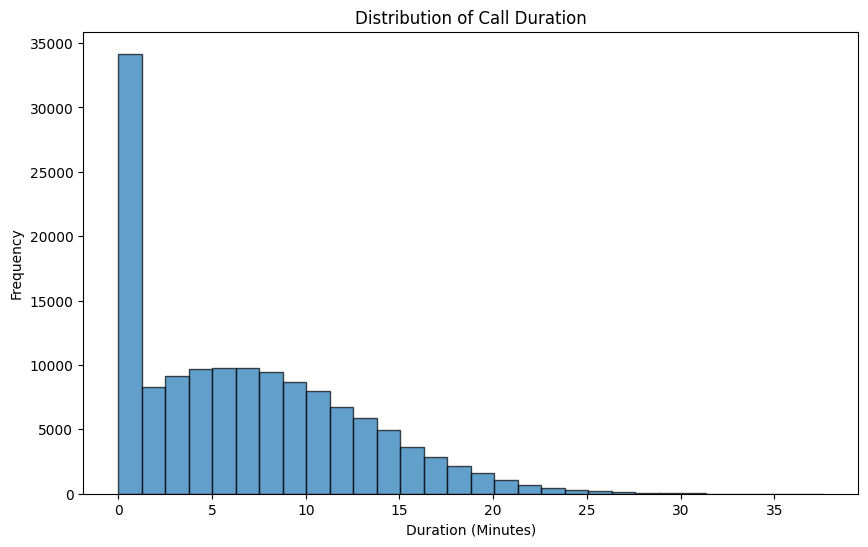

In [61]:

plt.figure(figsize=(10, 6))
plt.hist(dfCalls["duration"], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

## dfInternet EDA

In [62]:
dfInternet=dataset["dfInternet"]

In [63]:
dfInternet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


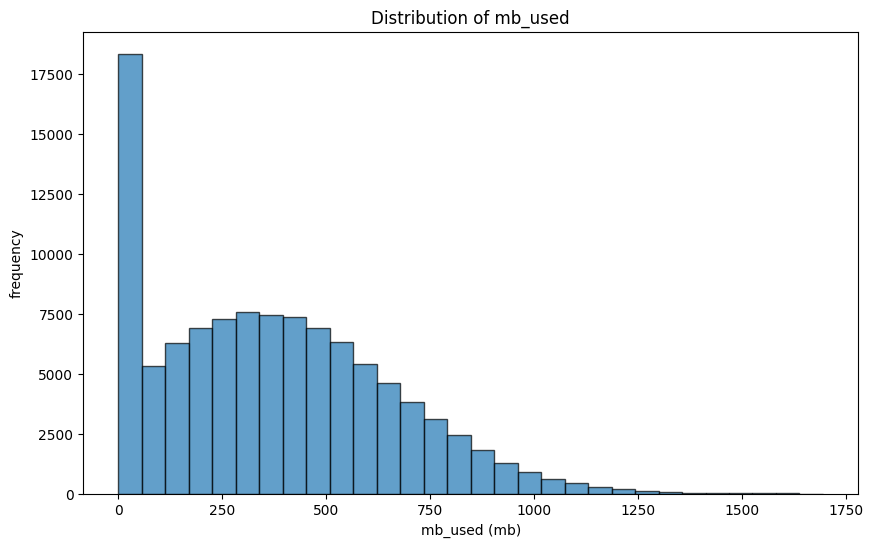

In [64]:

plt.figure(figsize=(10, 6))
plt.hist(dfInternet["mb_used"], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of mb_used')
plt.xlabel('mb_used (mb)')
plt.ylabel('frequency')
plt.show()

In [65]:
checkDataType(dfInternet)

id: <class 'str'>
user_id: <class 'numpy.int64'>
session_date: <class 'str'>
mb_used: <class 'numpy.float64'>


## Messages EDA

In [66]:
dfMessages=dataset["dfMessages"]

In [67]:
dfMessages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


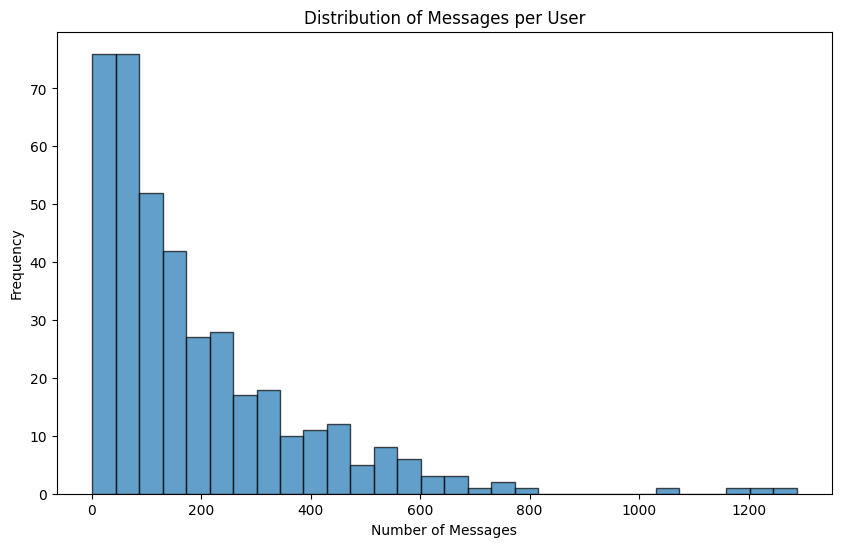

In [79]:
import matplotlib.pyplot as plt

# Assuming dfMessages is already defined
dfMessages = dataset["dfMessages"]

# Group by user_id and count the number of messages
messages_per_user = dfMessages.groupby("user_id").size()

# Plot the histogram of the distribution of messages per user
plt.figure(figsize=(10, 6))
plt.hist(messages_per_user, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Messages per User')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.show()

In [68]:
checkDataType(dfMessages)

id: <class 'str'>
user_id: <class 'numpy.int64'>
message_date: <class 'str'>


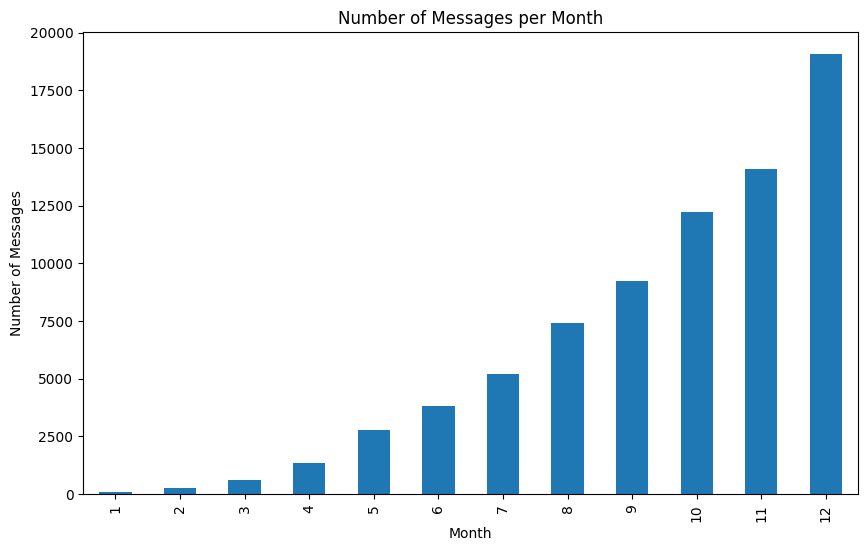

In [69]:

dfMessages["message_date"] = pd.to_datetime(dfMessages["message_date"])

dfMessages["month"] = dfMessages["message_date"].dt.month

messages_per_month = dfMessages.groupby("month").size()

# Plot the data
plt.figure(figsize=(10, 6))
messages_per_month.plot(kind='bar')
plt.title('Number of Messages per Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.show()

## Plans EDA

In [70]:
dfPlans=dataset["dfPlans"]

In [71]:
dfPlans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [72]:
dfPlans.describe

<bound method NDFrame.describe of    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  >

In [73]:
checkDataType(dfPlans)

messages_included: <class 'numpy.int64'>
mb_per_month_included: <class 'numpy.int64'>
minutes_included: <class 'numpy.int64'>
usd_monthly_pay: <class 'numpy.int64'>
usd_per_gb: <class 'numpy.int64'>
usd_per_message: <class 'numpy.float64'>
usd_per_minute: <class 'numpy.float64'>
plan_name: <class 'str'>


## Users EDA

In [74]:
dfUsers=dataset["dfUsers"]

In [75]:
dfUsers

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [76]:
checkDataType(dfUsers)

user_id: <class 'numpy.int64'>
first_name: <class 'str'>
last_name: <class 'str'>
age: <class 'numpy.int64'>
city: <class 'str'>
reg_date: <class 'str'>
plan: <class 'str'>
churn_date: <class 'float'>


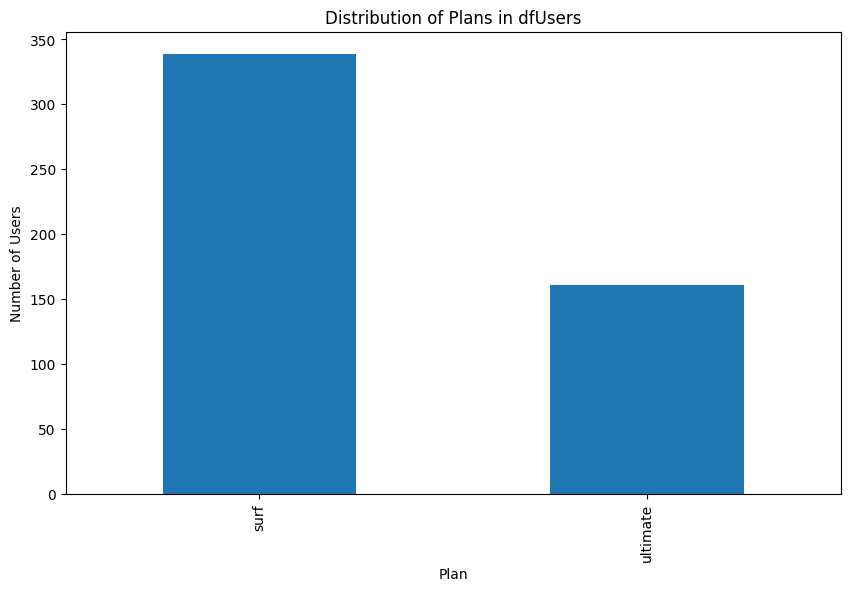

In [77]:
plan_distribution = dfUsers["plan"].value_counts()

plt.figure(figsize=(10, 6))
plan_distribution.plot(kind='bar')
plt.title('Distribution of Plans in dfUsers')
plt.xlabel('Plan')
plt.ylabel('Number of Users')
plt.show()